In [1]:
seurat = readRDS('initialSeurat_bcell1.RDS')

In [2]:
BCRmeta = readRDS('BCRmeta.RDS')
seurat@meta.data = BCRmeta

In [3]:
ls()

[1] "BCRmeta" "seurat"

In [4]:
library(Seurat)
library(ggplot2)
library(dplyr)
seurat@meta.data[,c('UMAP1', 'UMAP2')] = Embeddings(seurat, 'umap')

Warning message:
"package 'Seurat' was built under R version 4.1.3"
Attaching SeuratObject

Attaching sp

Warning message:
"package 'ggplot2' was built under R version 4.1.3"
Warning message:
"package 'dplyr' was built under R version 4.1.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [5]:
Axis_themes <- theme(plot.title = element_text(size = 8),
                     axis.title = element_text(size = 8), 
                     axis.text = element_text(size = 8),
                     axis.text.x = element_text(size = 8),
                     legend.text = element_text(size =8),
                     legend.title = element_text(size = 8),
                     strip.text.x = element_text(size = 8), 
                    axis.line = element_line(size = .355), 
                    axis.ticks = element_line(size = .177))
UMAP_theme <- theme_bw()+theme(axis.text.y = element_blank(), 
                               axis.text.x = element_blank(), 
                               axis.ticks.x= element_blank(),
                               axis.ticks.y= element_blank(),
                               axis.title.x= element_blank(),
                               axis.title.y= element_blank(),
                               strip.text.x = element_text(size = 8),
                               panel.grid.major = element_blank(),
                               panel.grid.minor = element_blank(),
                               panel.border = element_blank(),
                               panel.background = element_rect(colour = "black", fill = NA,size=.355),
                               legend.position = "none",
                               plot.title = element_text(hjust = 0.5, size = 8))

Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."
Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."


In [6]:
seurat = FindClusters(seurat, resolution = .2)
seurat$cluster = seurat$RNA_snn_res.0.2


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 24806
Number of edges: 910907

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9333
Number of communities: 10
Elapsed time: 17 seconds


Warning message:
"package 'RColorBrewer' was built under R version 4.1.3"
Warning message:
"package 'ggrastr' was built under R version 4.1.3"


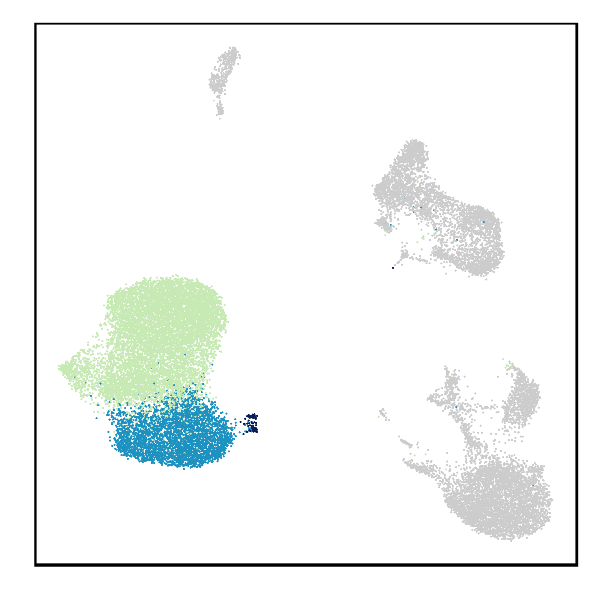

In [7]:
options(repr.plot.width = 2, repr.plot.height = 2, repr.plot.res = 300)
library(RColorBrewer)
seurat$cluster_name = 'Non-B cell'
seurat$cluster_name[seurat$cluster == 0] = 'Naive B cell'
seurat$cluster_name[seurat$cluster == 3] = 'MBC'
seurat$cluster_name[seurat$cluster == 8] = 'PB'
seurat$cluster_name = factor(seurat$cluster_name, levels =c ('Non-B cell', 'Naive B cell', 'MBC', 'PB'))
library(ggrastr)
cluster_palette = c('grey80', brewer.pal(9, 'YlGnBu')[c(3,6,9)]) 
g1 = ggplot(seurat@meta.data[sample(rownames(seurat@meta.data)),], aes(x = UMAP1,  y = UMAP2, color = cluster_name)) + geom_point_rast(size = .2, stroke = 0, raster.dpi = 1000) + UMAP_theme + scale_color_manual(values = cluster_palette)
g1
ggsave('Figures/umap1.pdf', height = 1.8, width = 1.8, useDingbats = FALSE)

In [8]:
library(ggplot2)
library(dplyr)


R version 4.1.0 (2021-05-18)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows Server x64 (build 14393)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggrastr_1.0.1      RColorBrewer_1.1-3 dplyr_1.0.9        ggplot2_3.4.2     
[5] sp_1.4-7           SeuratObject_4.1.0 Seurat_4.1.1      

loaded via a namespace (and not attached):
  [1] ggbeeswarm_0.6.0      Rtsne_0.16            colorspace_2.0-3     
  [4] deldir_1.0-6          ellipsis_0.3.2        ggridges_0.5.3       
  [7] IRdisplay_1.0         base64enc_0.1-3       spatstat.data_2.2-0  
 [10] farver_2.1.0          leiden_0.3.10         listenv_0.8.0        
 [13] ggrepel_0.9.1         fansi

[1] "CD19"    "MS4A1"   "IGHM"    "IGHD"    "PAX5"    "FCRL1"   "FCRL3"  
 [8] "PRDM4"   "NFKBIA"  "NT5E"    "KLF6"    "GPR183"  "HLA-DRA" "CD38"   
[15] "XBP1"    "PRDM1"   "MZB1"    "IRF4"

Warning message:
"package 'viridis' was built under R version 4.1.3"
Loading required package: viridisLite

Warning message:
"package 'viridisLite' was built under R version 4.1.3"


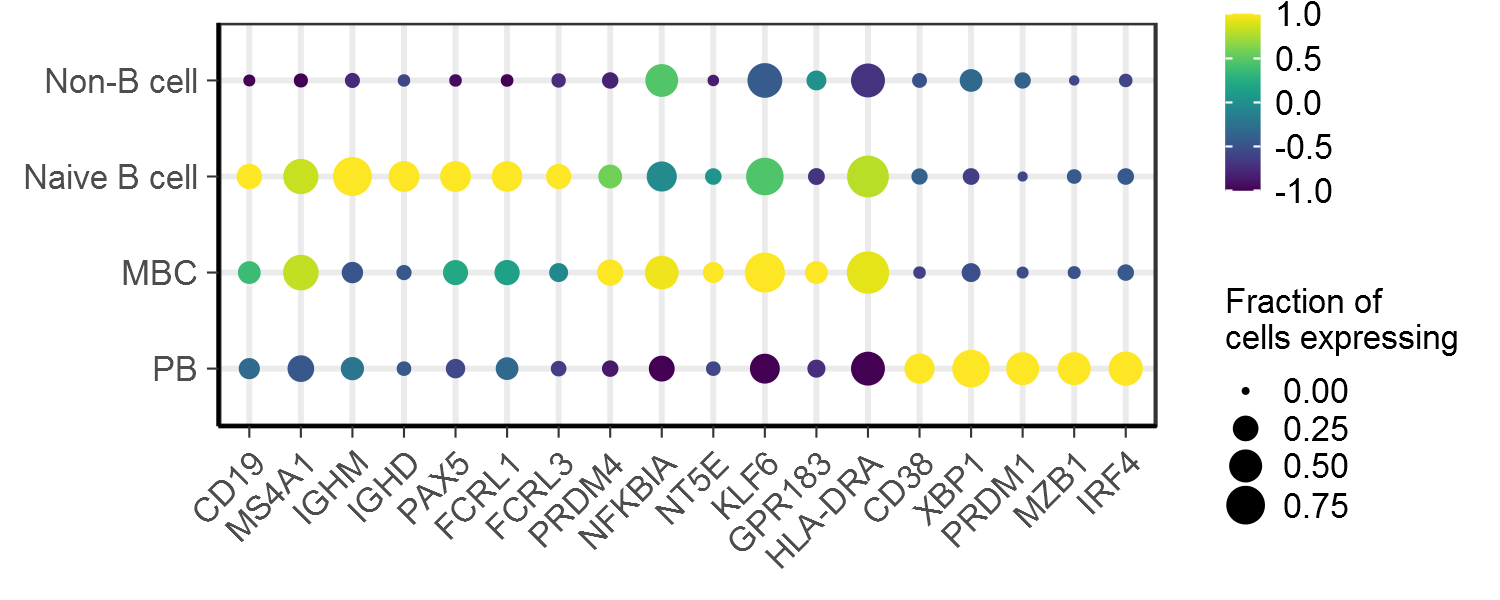

In [11]:
options(repr.plot.width = 5, repr.plot.height = 2)
DefaultAssay(seurat) = 'RNA'
genes = c('CD19', 'MS4A1', "IGHM", 'IGHD', 'PAX5', 'FCRL1', 'FCRL3','PRDM4', 'NFKBIA', 'NT5E', 'KLF6', 'GPR183','HLA-DRA',  'CD38', 'XBP1', 'PRDM1', 'MZB1', 'IRF4')  
genes[]
pct = function(x) {
  sum(x >0)/length(x)
}
meanexp = function(x) {
    mean(x)
}

data = as.data.frame(t(as.matrix(GetAssayData(seurat)[genes,])))

library(reshape2)
library(viridis)
data$phenotype = seurat$cluster_name
df_exp = data %>% group_by(phenotype) %>% summarize_all(.funs = list(meanexp)) %>% as.data.frame() 
df_exp[,2:(1+length(genes))] = scale(df_exp[,2:(1+length(genes))])
df_exp = df_exp %>% melt(id.vars = 'phenotype')
df_pct = data %>% group_by(phenotype) %>% summarize_all(.funs = list(pct)) %>% melt(id.vars = 'phenotype')
df_exp$value[df_exp$value > 1] = 1
df_exp$value[df_exp$value < -1]= -1

df_exp$pct = df_pct$value

lvs = levels(factor(df_exp$phenotype))

ggplot(as.data.frame(df_exp), aes(y = phenotype, x = variable, size = pct, color = value)) + geom_point() + scale_color_viridis()  + 
 theme_bw()  + theme(axis.title = element_blank()) +# guides(size = FALSE, color = FALSE) + 
labs(color = "Scaled\nexpression", size = 'Fraction of\ncells expressing') + scale_x_discrete(limits = genes) + Axis_themes + 
theme(legend.key.size = unit(.3, 'cm'), axis.title = element_blank(), axis.text.x = element_text(size = 8, hjust = 1, angle = 45)) + 
scale_y_discrete(limits = rev(lvs))+ scale_size_continuous(limits = c(0, 1), range = c(.01, 4), breaks = c(0,.25, .5, .75))

ggsave('Figures/dots.pdf', useDingbats = FALSE, width = 4.3, height = 1.8)


Warning message:
"package 'ggbeeswarm' was built under R version 4.1.3"
`summarise()` has grouped output by 'orig'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'cluster_name'. You can override using the `.groups` argument.
Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as of ggplot2 3.3.4."
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


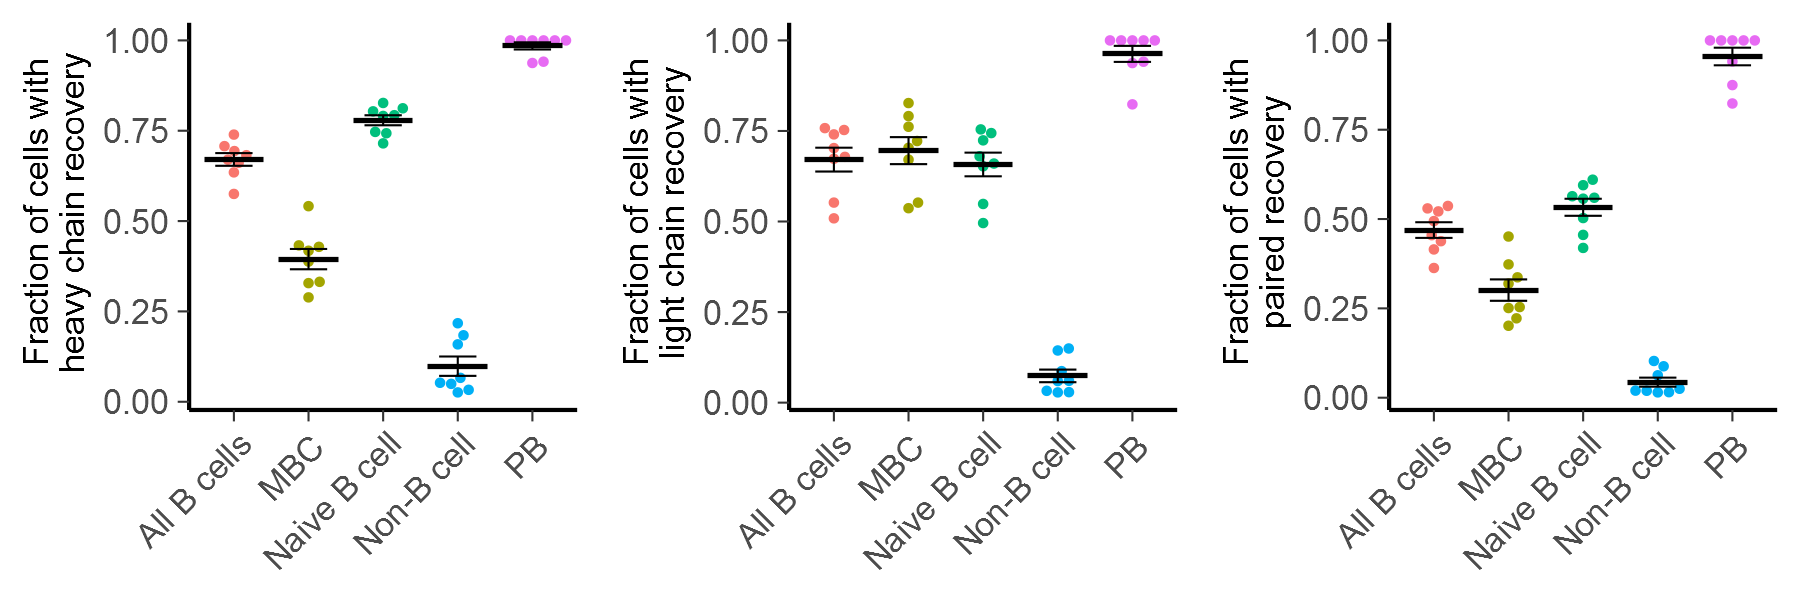

In [12]:
library(ggbeeswarm)
options(repr.plot.width = 6)
df = seurat@meta.data %>% filter( RNA_snn_res.0.2 != 9) %>% group_by(orig, cluster_name) %>% summarize(   both = sum(IGH_recovery * IGL_recovery)/n(),IGH_recovery = sum(IGH_recovery == 1)/n(), tot = n(), IGL_recovery = sum(IGL_recovery == 1)/n(), 
                                                                                                   ) %>% tidyr::complete(fill = list(frac = 0))
library(reshape2)

also = seurat@meta.data %>% filter(cluster_name != 'Non-B cell') %>% group_by(orig)%>% summarize(   both = sum(IGH_recovery * IGL_recovery)/n(),IGH_recovery = sum(IGH_recovery == 1)/n(), tot = n(), IGL_recovery = sum(IGL_recovery == 1)/n(), 
                                                                                                   ) %>% tidyr::complete(fill = list(frac = 0)) %>% mutate(cluster_name = 'All B cells')

df$cluster_name = factor(df$cluster_name, levels = c(levels(df$cluster_name), 'All B cells'))
df = rbind(df, also)


df2 = melt(df, id.vars = c('orig', 'cluster_name'))
df2 = df2 %>% group_by(cluster_name,  variable) %>% summarize(mean = mean(value), sd = sd(value)/sqrt(n())) %>% mutate(ymin = mean-sd, ymax = mean+sd)




g1 = ggplot(df, aes(x = cluster_name, y = IGH_recovery, color = cluster_name) ) + geom_beeswarm(cex = 3, size = .3) + theme_classic() + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
labs(x = c(), y = 'Fraction of cells with\nheavy chain recovery') + Axis_themes+
stat_summary(data = df2 %>% filter(variable == 'IGH_recovery' ), aes(y = mean), geom='crossbar', size = .177, color = 'black', width = .8) + 
geom_errorbar(data = df2 %>% filter(variable == 'IGH_recovery' ), aes(y = mean, ymin = ymin, ymax = ymax), size = .177, color = 'black', width = .5) + 
labs(color = c()) + guides(color = FALSE)

g2 = ggplot(df, aes(x = cluster_name, y = IGL_recovery, color = cluster_name)) + geom_beeswarm(cex = 3, size = .3) + theme_classic() + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
labs(x = c(), y = 'Fraction of cells with\nlight chain recovery') + Axis_themes+ 
stat_summary(data = df2 %>% filter(variable == 'IGL_recovery' ), aes(y = mean), geom='crossbar', size = .177, color = 'black', width = .8) + 
geom_errorbar(data = df2 %>% filter(variable == 'IGL_recovery' ), aes(y = mean, ymin = ymin, ymax = ymax), size = .177, color = 'black', width = .5) + 
labs(color = c()) + guides(color = FALSE)

g3 = ggplot(df, aes(x = cluster_name, y = both, color = cluster_name)) + geom_beeswarm(cex = 3, size = .3) + theme_classic() + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
labs(x = c(), y = 'Fraction of cells with\npaired recovery') + Axis_themes+ 
stat_summary(data = df2 %>% filter(variable == 'both' ), aes(y = mean), geom='crossbar', size = .177, color = 'black', width = .8) + 
geom_errorbar(data = df2 %>% filter(variable == 'both' ), aes(y = mean, ymin = ymin, ymax = ymax), size = .177, color = 'black', width = .5) + 
labs(color = c()) + guides(color = FALSE)

cowplot::plot_grid(g1, g2, g3, ncol = 3)

`summarise()` has grouped output by 'orig'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'cluster_name'. You can override using the `.groups` argument.
No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


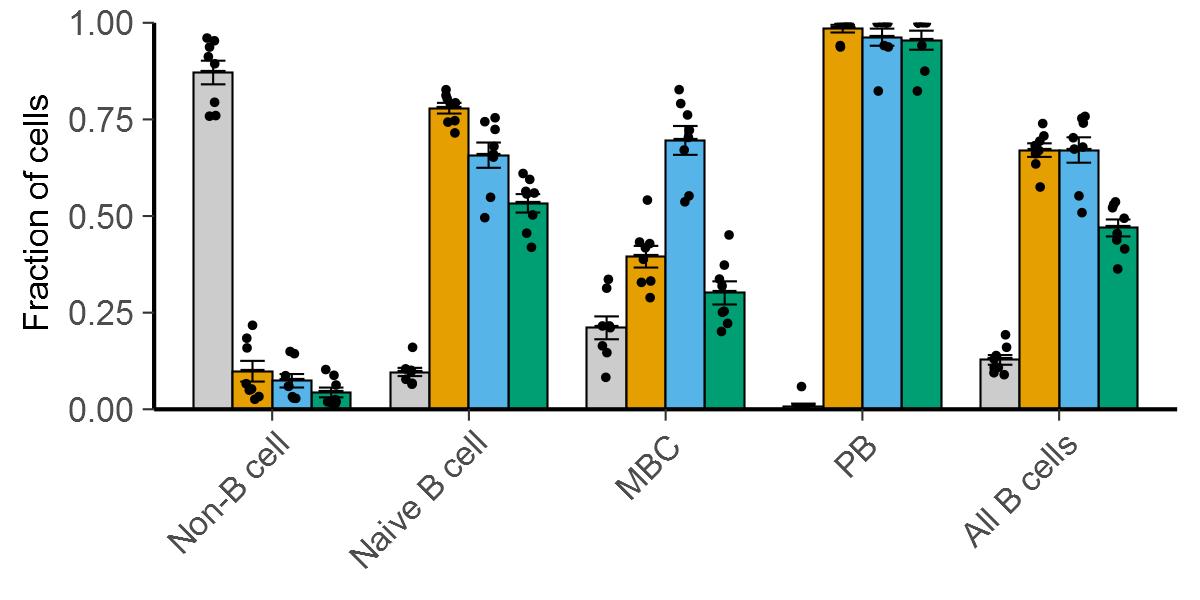

In [13]:
options(repr.plot.width = 4)
cbp1 <- c("grey80", "#E69F00", "#56B4E9", "#009E73",
          "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

df = seurat@meta.data %>% filter( RNA_snn_res.0.2 != 9) %>% group_by(orig, cluster_name) %>% summarize(none = sum(IGH_recovery == 0 & IGL_recovery== 0)/n(),   both = sum(IGH_recovery * IGL_recovery)/n(),IGH_recovery = sum(IGH_recovery == 1)/n(), tot = n(), IGL_recovery = sum(IGL_recovery == 1)/n(), 
                                                                                                   ) %>% tidyr::complete(fill = list(frac = 0))
library(reshape2)

also = seurat@meta.data %>% filter(cluster_name != 'Non-B cell') %>% group_by(orig)%>% summarize(none = sum(IGH_recovery == 0 & IGL_recovery== 0)/n(),   both = sum(IGH_recovery * IGL_recovery)/n(),IGH_recovery = sum(IGH_recovery == 1)/n(), tot = n(), IGL_recovery = sum(IGL_recovery == 1)/n(), 
                                                                                                   ) %>% tidyr::complete(fill = list(frac = 0)) %>% mutate(cluster_name = 'All B cells')

df$cluster_name = factor(df$cluster_name, levels = c(levels(df$cluster_name), 'All B cells'))
df = rbind(df, also)


df2 = melt(df, id.vars = c('orig', 'cluster_name'))
df2 = df2 %>% group_by(cluster_name,  variable) %>% summarize(mean = mean(value), sd = sd(value)/sqrt(n()), n = n()) %>% mutate(ymin = mean-sd, ymax = mean+sd)

df3 = melt(df, id.vars = c('orig', 'cluster_name')) %>% filter(variable != 'tot')
df3$cluster_name = factor(df3$cluster_name, levels = c('Non-B cell', 'Naive B cell', 'MBC', 'PB', 'All B cells'))
df3$variable = factor(df3$variable, levels = c('none', 'IGH_recovery', 'IGL_recovery', 'both'))
df2$variable =  factor(df2$variable, levels = c('none', 'IGH_recovery', 'IGL_recovery', 'both'))

dodgewidth = .8

g3 = ggplot(df3, aes(x = cluster_name, y = value, group = variable))  + 
stat_summary(data = df2 %>%filter(variable != 'tot'), aes(y = mean), geom='crossbar', size = .177, width = .5, position = position_dodge(width = dodgewidth)) + geom_col(data = df2 %>% filter(variable != 'tot'),  aes(x = cluster_name, y = mean, fill = variable), position = position_dodge(width = dodgewidth), width = dodgewidth, color = 'black', size = .177) + 
 geom_point(aes(group = variable, fill = variable), position = position_jitterdodge(dodge.width = dodgewidth, jitter.width = .2), size= .2, color = 'black') +
geom_errorbar(data = df2%>%filter(variable != 'tot'), aes(y = mean, ymin = ymin, ymax = ymax), size = .177,  width = .5, position = position_dodge(width = dodgewidth))  + 
labs(x = c(), y = 'Fraction of cells', color = 'BCR Recovery') + theme_classic() + Axis_themes + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + scale_color_manual(
values = cbp1, labels = c('Neither chain', 'Heavy chain only', "Light chain only", 'Paired chains')) + scale_fill_manual(values = cbp1, labels = c('Neither chain', 'Heavy chain only', "Light chain only", 'Paired chains'))  + 
guides(color = FALSE) + scale_x_discrete(limits = c('Non-B cell', 'Naive B cell', "MBC", 'PB', 'All B cells')) + 
theme(legend.key.size = unit(.3, 'cm')) + labs(fill = 'BCR recovery') + scale_y_continuous(expand = c(0,0)) + guides(fill = FALSE)
g3
ggsave('Figures/recovery_bars.pdf', height = 2.2, width = 2.2, useDingbats = FALSE)

In [14]:
df2 %>% filter(cluster_name == 'All B cells')

cluster_name,variable,mean,sd,n,ymin,ymax
<chr>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
All B cells,none,0.1277813,0.01252045,8,0.1152608,0.1403017
All B cells,both,0.4691839,0.02194168,8,0.4472423,0.4911256
All B cells,IGH_recovery,0.6705457,0.01754688,8,0.6529988,0.6880925
All B cells,NA,1706.1250000,585.04952286,8,1121.0754771,2291.1745229
All B cells,IGL_recovery,0.6708570,0.03287517,8,0.6379818,0.7037322


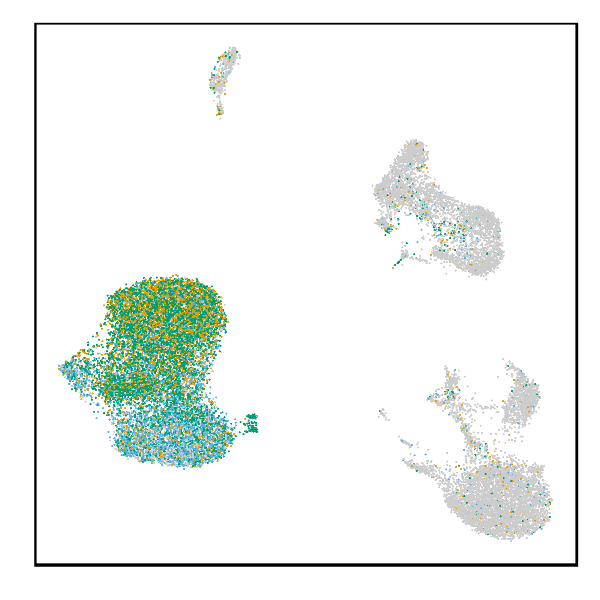

In [15]:
options(repr.plot.width = 2, repr.plot.height = 2)
g2 = ggplot(seurat@meta.data[sample(rownames(seurat@meta.data)),], aes(x = UMAP1,  y = UMAP2, color = factor(recovery))) + geom_point_rast(size = .2, stroke = 0, raster.dpi = 1000) + UMAP_theme + scale_color_manual(values =cbp1[c(1,3,2,4)])
g2
ggsave('Figures/umap_recovery.pdf', useDingbats = FALSE, width = 1.8, height = 1.8)


No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


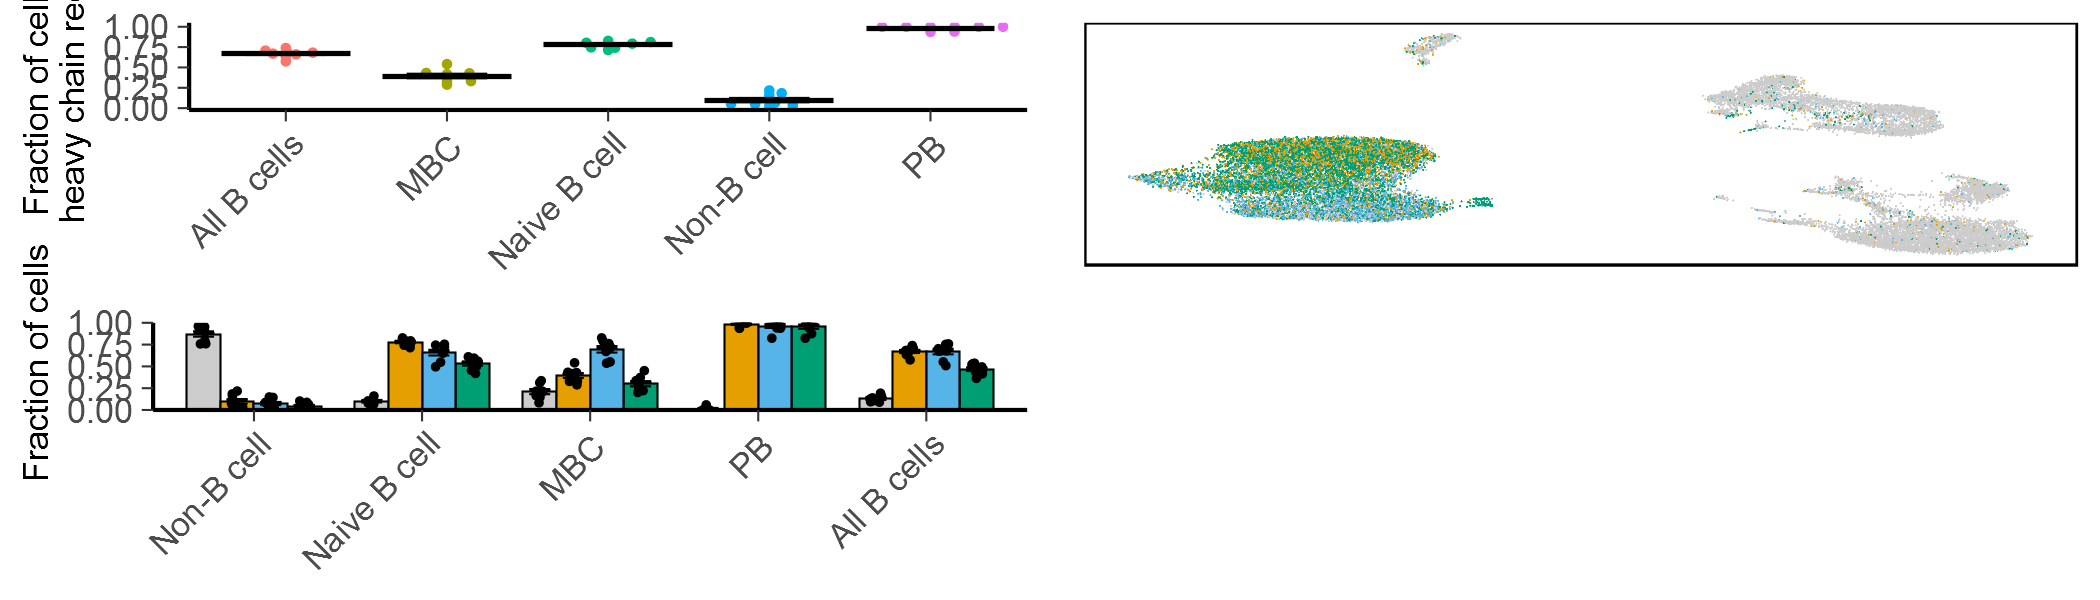

In [16]:
options(repr.plot.width = 7, repr.plot.height = 2)
cowplot::plot_grid(g1, g2, g3, rel_widths = c(1.8, 1.8, 2.8))

In [17]:
 seurat@meta.data %>% filter(cluster_name != 'Non-B cell')%>% summarize(none = sum(IGH_recovery == 0 & IGL_recovery== 0)/n(),   both = sum(IGH_recovery * IGL_recovery)/n(),IGH_recovery = sum(IGH_recovery == 1)/n(), tot = n(), IGL_recovery = sum(IGL_recovery == 1)/n(), 
                                                                                                   ) %>% tidyr::complete(fill = list(frac = 0)) %>% mutate(cluster_name = 'All B cells')
 seurat@meta.data %>% group_by(cluster_name) %>% summarize(none = sum(IGH_recovery == 0 & IGL_recovery== 0)/n(),   both = sum(IGH_recovery * IGL_recovery)/n(),IGH_recovery = sum(IGH_recovery == 1)/n(), tot = n(), IGL_recovery = sum(IGL_recovery == 1)/n(), 
                                                                                                   ) %>% tidyr::complete(fill = list(frac = 0)) %>% mutate(cluster_name = 'All B cells')

none,both,IGH_recovery,tot,IGL_recovery,cluster_name
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
0.1293135,0.4434024,0.6813686,13649,0.6327203,All B cells


cluster_name,none,both,IGH_recovery,tot,IGL_recovery
<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
All B cells,0.93259837,0.02240746,0.04732455,11157,0.04248454
All B cells,0.08792557,0.50526531,0.79633984,9781,0.62099990
All B cells,0.23902697,0.27234268,0.37731359,3782,0.65600212
All B cells,0.01162791,0.93023256,0.97674419,86,0.94186047


In [18]:
 seurat@meta.data %>% filter(cluster_name != 'Non-B cell')%>% summarize(none = sum(IGH_recovery == 0 & IGL_recovery== 0)/n(),   both = sum(IGH_recovery * IGL_recovery)/n(),IGH_recovery = sum(IGH_recovery == 1)/n(), tot = n(), IGL_recovery = sum(IGL_recovery == 1)/n(), 
                                                                                                   ) %>% tidyr::complete(fill = list(frac = 0)) %>% mutate(cluster_name = 'All B cells')
 seurat@meta.data %>% group_by(cluster_name) %>% summarize(none = sum(IGH_recovery == 0 & IGL_recovery== 0)/n(),   both = sum(IGH_recovery * IGL_recovery)/n(),IGH_recovery = sum(IGH_recovery == 1)/n(), tot = n(), IGL_recovery = sum(IGL_recovery == 1)/n(), 
                                                                                                   ) %>% tidyr::complete(fill = list(frac = 0)) %>% mutate(cluster_name = 'All B cells')

none,both,IGH_recovery,tot,IGL_recovery,cluster_name
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
0.1293135,0.4434024,0.6813686,13649,0.6327203,All B cells


cluster_name,none,both,IGH_recovery,tot,IGL_recovery
<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
All B cells,0.93259837,0.02240746,0.04732455,11157,0.04248454
All B cells,0.08792557,0.50526531,0.79633984,9781,0.62099990
All B cells,0.23902697,0.27234268,0.37731359,3782,0.65600212
All B cells,0.01162791,0.93023256,0.97674419,86,0.94186047


In [19]:
options(repr.plot.res = 300)
igh_all = rownames(seurat)[grep(x = rownames(seurat), pattern = '^IGH')]
seurat$IGH_sum = colSums(GetAssayData(seurat, 'counts')[igh_all,])

igk_all = rownames(seurat)[grep(x = rownames(seurat), pattern = '^IGK')]
seurat$IGK_sum = colSums(GetAssayData(seurat, 'counts')[igk_all,])

igl_all = rownames(seurat)[grep(x = rownames(seurat), pattern = '^IGL')]
seurat$IGL_sum = colSums(GetAssayData(seurat, 'counts')[igl_all,])

Warning message:
"`position_dodge()` requires non-overlapping x intervals"
Warning message:
"`position_dodge()` requires non-overlapping x intervals"


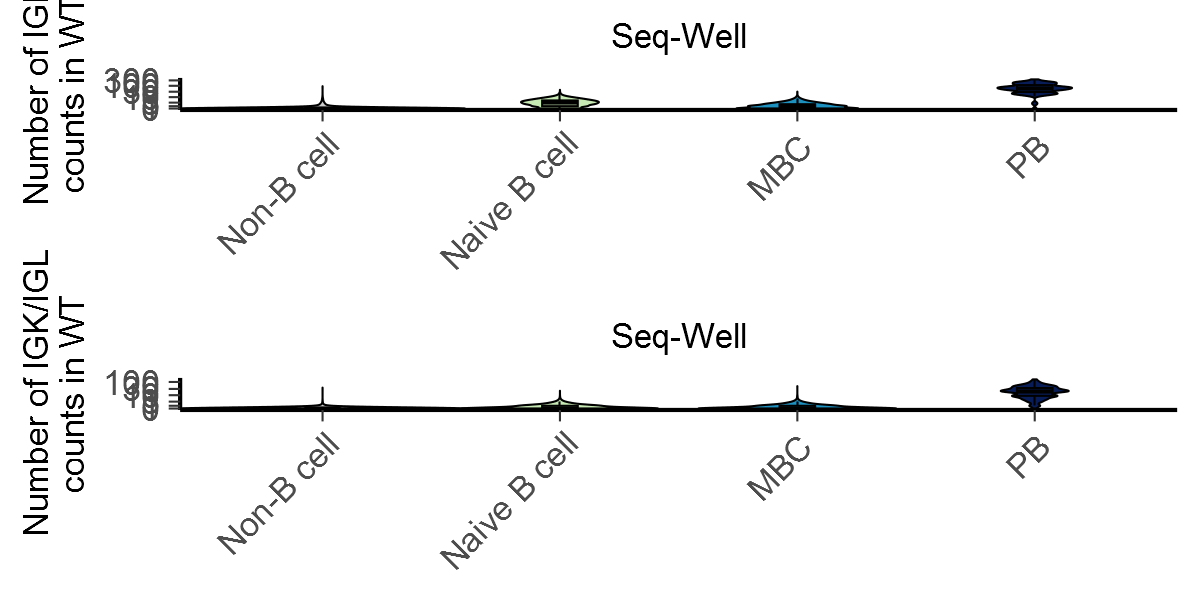

In [20]:
options(repr.plot.res = 300, repr.plot.width = 4)
g1 = ggplot(seurat@meta.data, aes(x = cluster_name, y = IGH_sum, fill = cluster_name)) + geom_violin(color = 'black', size = .177, width= 1.2, bw = .1, adjust = 2)  +
geom_boxplot(width = .15, outlier.size = 0, size = .177, color = 'black',  outlier.shape = NA) + 
scale_y_continuous(trans = scales::pseudo_log_trans(sigma = 1, base = exp(1)), breaks = c(0,1, 3, 10, 30, 100, 300)) + 
scale_fill_manual(values = cluster_palette) + guides(fill = FALSE) + theme_classic() + Axis_themes + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
labs(x = c(), y = 'Number of IGH\ncounts in WT') + ggtitle('Seq-Well') + theme(plot.title = element_text(hjust = .5))


g2 = ggplot(seurat@meta.data, aes(x = cluster_name, y = IGK_sum+IGL_sum, fill = cluster_name)) + geom_violin(color = 'black', size = .177, width= 1.2, bw = .1, adjust = 2)  +
geom_boxplot(width = .15, outlier.size = 0, size = .177, color = 'black',  outlier.shape = NA, fill = NA) + 
scale_y_continuous(trans = scales::pseudo_log_trans(sigma = 1, base = exp(1)), breaks = c(0,1, 3, 10, 30, 100,  300)) + 
scale_fill_manual(values = cluster_palette) + guides(fill = FALSE) + theme_classic() + Axis_themes + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
labs(x = c(), y = 'Number of IGK/IGL\ncounts in WT')   + ggtitle('Seq-Well')+ theme(plot.title = element_text(hjust = .5))

cowplot::plot_grid(g1, g2, ncol = 1)

ggsave('Figures/pheno_bcr_counts.pdf', height = 4, width = 2, useDingbats = FALSE)


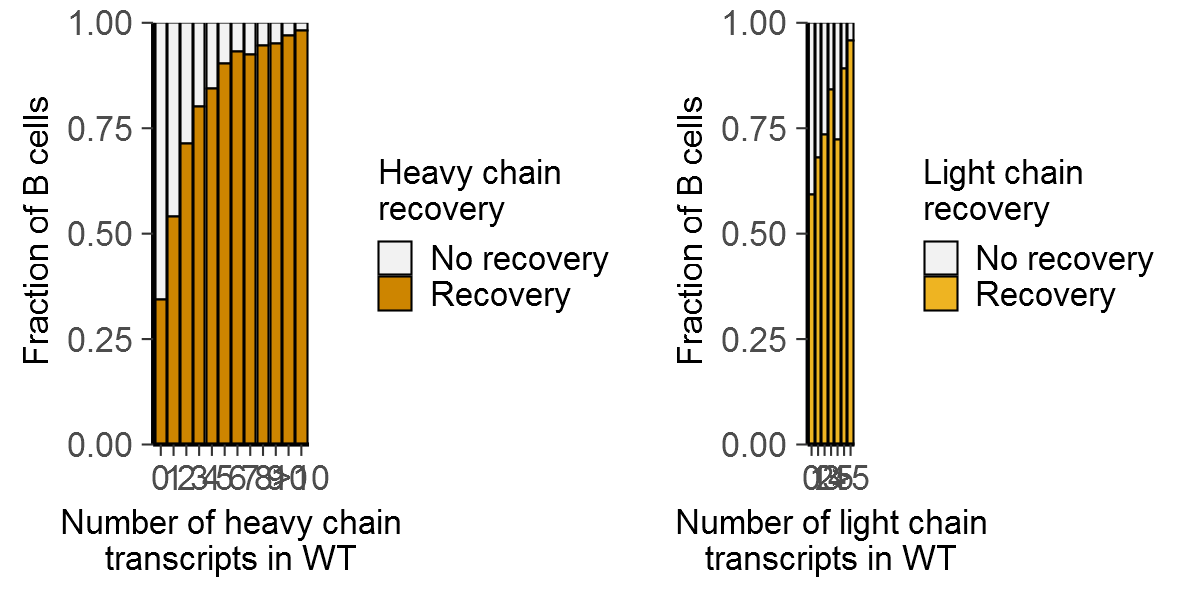

In [21]:
seurat@meta.data$IGH_bin = cut(seurat@meta.data$IGH_sum, c(-1,0, 1, 2, 3,4 , 5, 6, 7, 8, 9, 10, 1000))

g1 = ggplot(seurat@meta.data %>% filter(cluster_name != "Non-B cell"), aes(x = IGH_bin, fill = factor(IGH_recovery))) + geom_bar(position = 'fill', color = 'black', size = .177)+ 
scale_fill_manual(values = rev(c('orange3', 'grey95')), labels = c('No recovery', 'Recovery')) + scale_x_discrete(labels =c ('0', 1, 2, 3, 4, 5,6 ,7 , 8, 9, 10, '>10')) + theme_classic() + Axis_themes + 
scale_y_continuous(expand = c(0,0))+
labs(x =  c('Number of heavy chain\ntranscripts in WT'), y = 'Fraction of B cells', fill = 'Heavy chain\nrecovery') + theme(legend.key.size = unit(.3, 'cm'))


seurat@meta.data$IGL_bin = cut(seurat@meta.data$IGK_sum+seurat$IGL_sum,  c(-1,0, 1, 2, 3,4 , 5, 1000)) 
g2 = ggplot(seurat@meta.data %>% filter(cluster_name != "Non-B cell"), aes(x = IGL_bin, fill = factor(IGL_recovery))) + geom_bar(position = 'fill', color = 'black', size = .177)+ 
scale_fill_manual(values = rev(c('goldenrod2', 'grey95')), labels = c('No recovery', 'Recovery')) + scale_x_discrete(labels =c ('0', 1, 2, 3, 4, 5, '>5')) + theme_classic() + Axis_themes + 
scale_y_continuous(expand = c(0,0))+
labs(x = c('Number of light chain\ntranscripts in WT'), y = 'Fraction of B cells', fill = 'Light chain\nrecovery') + theme(legend.key.size = unit(.3, 'cm'))

cowplot::plot_grid(g1, g2, rel_widths = c(1.2, 1))
ggsave('Figures/recovery_by_trans.pdf', height = 2, width = 6, useDingbats = FALSE)


#ggplot(seurat@meta.data %>% filter(cluster_name != "Non-B cell"), aes(x = IGL_bin, fill = factor(IGL_recovery))) + geom_bar(position = 'fill')

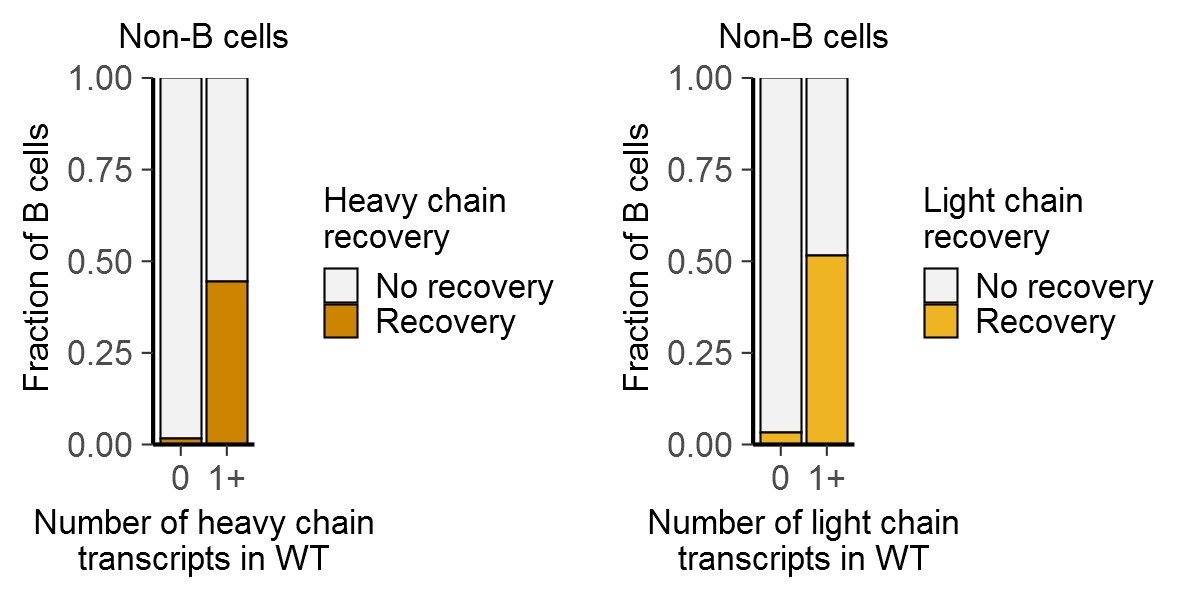

In [22]:
sub = seurat@meta.data %>% filter(cluster_name == 'Non-B cell')
sub$hasIGH = ifelse(sub$IGH_sum > 0, '1+', 0)
sub$hasIGL = ifelse(sub$IGK_sum > 0 | sub$IGL_sum > 0, '1+', 0)

g1 = ggplot(sub, aes(x = hasIGH, fill = factor(IGH_recovery))) + geom_bar(position = 'fill', color = 'black', size = .177)+ 
scale_fill_manual(values = rev(c('orange3', 'grey95')), labels = c('No recovery', 'Recovery'))  + theme_classic() + Axis_themes + 
scale_y_continuous(expand = c(0,0))+
labs(x =  c('Number of heavy chain\ntranscripts in WT'), y = 'Fraction of B cells', fill = 'Heavy chain  \nrecovery') + theme(legend.key.size = unit(.3, 'cm'), plot.title = element_text(hjust = .5)) + 
ggtitle('Non-B cells')

g2 = ggplot(sub, aes(x = hasIGL, fill = factor(IGL_recovery))) + geom_bar(position = 'fill', color = 'black', size = .177)+ 
scale_fill_manual(values = rev(c('goldenrod2', 'grey95')), labels = c('No recovery', 'Recovery'))  + theme_classic() + Axis_themes + 
scale_y_continuous(expand = c(0,0))+
labs(x = c('Number of light chain\ntranscripts in WT'), y = 'Fraction of B cells', fill = 'Light chain  \nrecovery') + theme(legend.key.size = unit(.3, 'cm'), plot.title = element_text(hjust = .5)) + 
ggtitle('Non-B cells')
cowplot::plot_grid(g1, g2)

ggsave('Figures/nonbcells.pdf', height = 2, width = 4, useDingbats = FALSE)


In [23]:
a = seurat@meta.data %>% filter(cluster_name != 'Non-B cell') %>% mutate(frac = IGH_sum/nCount_RNA)
summary(a$frac)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.001144 0.002957 0.004040 0.005545 0.188757 

In [24]:
summary(seurat@meta.data$nCount_RNA[seurat@meta.data$nFeature_RNA > 500 & seurat@meta.data$cluster_name == "MBC"])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    674     913    1056    1136    1272    3398 

In [25]:
seurat

An object of class Seurat 
26197 features across 24806 samples within 1 assay 
Active assay: RNA (26197 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

[1] 0.7970826

[1] 3.005319

[1] 4.974127

Warning message in geom_abline(slope = 1, yintercept = 0, linetype = "dashed", color = "red", :
"Ignoring unknown parameters: `yintercept`"
Warning message in geom_abline(slope = 1, yintercept = 0, linetype = "dashed", color = "red", :
"Ignoring unknown parameters: `yintercept`"
Warning message in geom_abline(slope = 1, yintercept = 0, linetype = "dashed", color = "red", :
"Ignoring unknown parameters: `yintercept`"
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 16107 rows containing non-finite values (`stat_cor()`)."
Warning message:
"Removed 14978 rows containing missing values (`geom_point()`)."
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 23186 rows containing non-finite values (`stat_cor()`)."
Warn

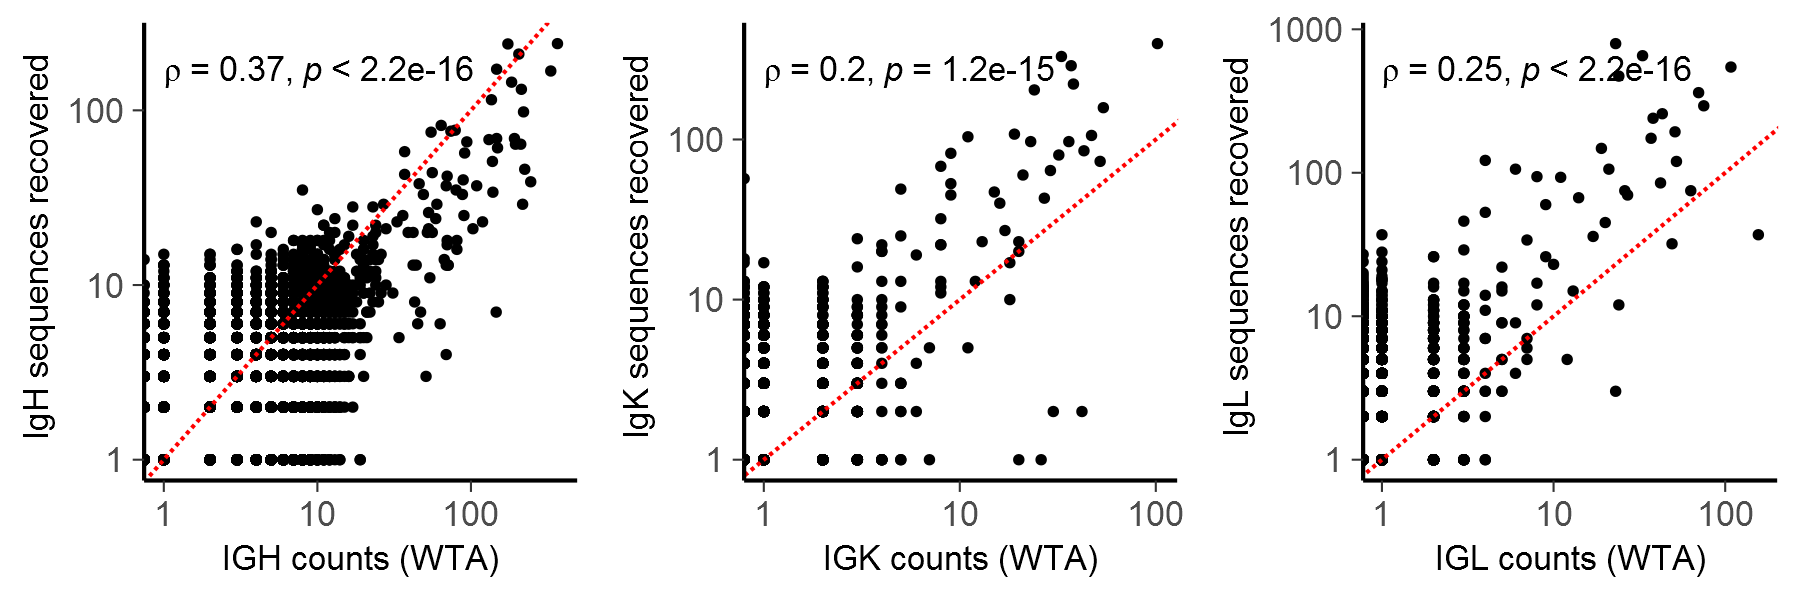

In [26]:
options(repr.plot.width = 6, repr.plot.height = 2, repr.plot.res = 300)
hc = readRDS('hc.RDS') %>% filter(FUNCTIONAL)
hc_counts = hc %>% group_by(LANE_ID) %>% summarize(n = n())
nrow(hc) / sum(seurat$IGH_sum)

seurat$IGH_recover = hc_counts$n[match(seurat$id, hc_counts$LANE_ID)]


kappa = readRDS('lc.RDS') %>% filter(FUNCTIONAL, LOCUS == 'IGK')
kappa_counts = kappa %>% group_by(LANE_ID) %>% summarize(n = n())
nrow(kappa) / sum(seurat$IGK_sum)
seurat$IGK_recover = kappa_counts$n[match(seurat$id, kappa_counts$LANE_ID)]


lamb = readRDS('lc.RDS') %>% filter(FUNCTIONAL, LOCUS == 'IGL')
lamb_counts = lamb %>% group_by(LANE_ID) %>% summarize(n = n())
nrow(lamb) / sum(seurat$IGL_sum)
seurat$IGL_recover = lamb_counts$n[match(seurat$id, lamb_counts$LANE_ID)]



library(ggpubr)
g1 = ggplot(seurat@meta.data, aes(x = IGH_sum, y = IGH_recover)) + geom_point(size = .4) + scale_x_log10() + scale_y_log10() + geom_abline(slope = 1, yintercept = 0, linetype = 'dashed', color = 'red', size = .355) + 
theme_classic() + Axis_themes + labs(x = 'IGH counts (WTA)', y  = 'IgH sequences recovered') + stat_cor(method = 'spearman', size = 2.1167*4/3, cor.coef.name = 'rho')
g1$layers[[2]]$aes_params$textsize <- 2.1167*8/6

g2 = ggplot(seurat@meta.data, aes(x = IGK_sum, y = IGK_recover)) + geom_point(size = .4) + scale_x_log10() + scale_y_log10() + geom_abline(slope = 1, yintercept = 0, linetype = 'dashed', color = 'red', size = .355) + 
theme_classic() + Axis_themes  + labs(x = 'IGK counts (WTA)', y  = 'IgK sequences recovered') + stat_cor(method = 'spearman', size = 2.1167*4/3, cor.coef.name = 'rho')
g2$layers[[2]]$aes_params$textsize <- 2.1167*8/6

g3 = ggplot(seurat@meta.data, aes(x = IGL_sum, y = IGL_recover)) + geom_point(size = .4) + scale_x_log10() + scale_y_log10() + geom_abline(slope = 1, yintercept = 0, linetype = 'dashed', color = 'red', size = .355) + 
theme_classic() + Axis_themes  + labs(x = 'IGL counts (WTA)', y  = 'IgL sequences recovered') + stat_cor(method = 'spearman', size = 2.1167*4/3, cor.coef.name = 'rho')
g3$layers[[2]]$aes_params$textsize <- 2.1167*8/6


cowplot::plot_grid(g1, g2, g3, ncol = 3)
ggsave('Figures/corplots.pdf', width = 6.7, height = 6.8/3, useDingbats = FALSE)

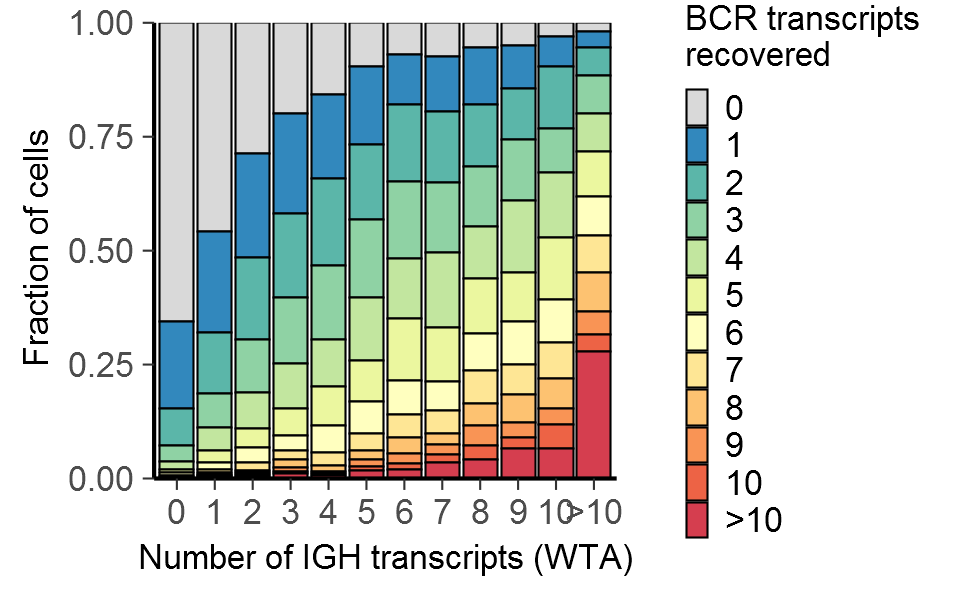

In [28]:
options(repr.plot.width = 3.2, repr.plot.height = 2)
seurat@meta.data$IGH_recover_bin= seurat@meta.data$IGH_recover
seurat@meta.data$IGH_recover_bin[is.na(seurat@meta.data$IGH_recover_bin) ] = 0
seurat@meta.data$IGH_recover_bin[seurat@meta.data$IGH_recover > 10] = '>10'
seurat@meta.data$IGH_recover_bin = factor(seurat@meta.data$IGH_recover_bin, levels =c (0,1,2,3,4,5,6,7,8,9,10,'>10'))
ggplot(seurat@meta.data %>% filter(cluster_name != 'Non-B cell'), aes(x = IGH_bin, fill = IGH_recover_bin)) + geom_bar(position = 'fill', size = .177, color = 'black')  + 
        scale_fill_manual(values = c('grey85', rev(colorRampPalette(brewer.pal(9, 'Spectral'))(11)))) + 
theme_classic() + Axis_themes +theme(legend.key.size = unit(2, 'mm')) + scale_x_discrete(labels= c(0, 1,2,3,4,5,6,7,8,9,10, '>10')) + 
# guides(fill = guide_legend(override.aes = list(size = .2)))+
scale_y_continuous(expand = c(0,0)) + labs(x = 'Number of IGH transcripts (WTA)', y = 'Fraction of cells', fill = 'Number of\nBCR transcripts\nrecovered')

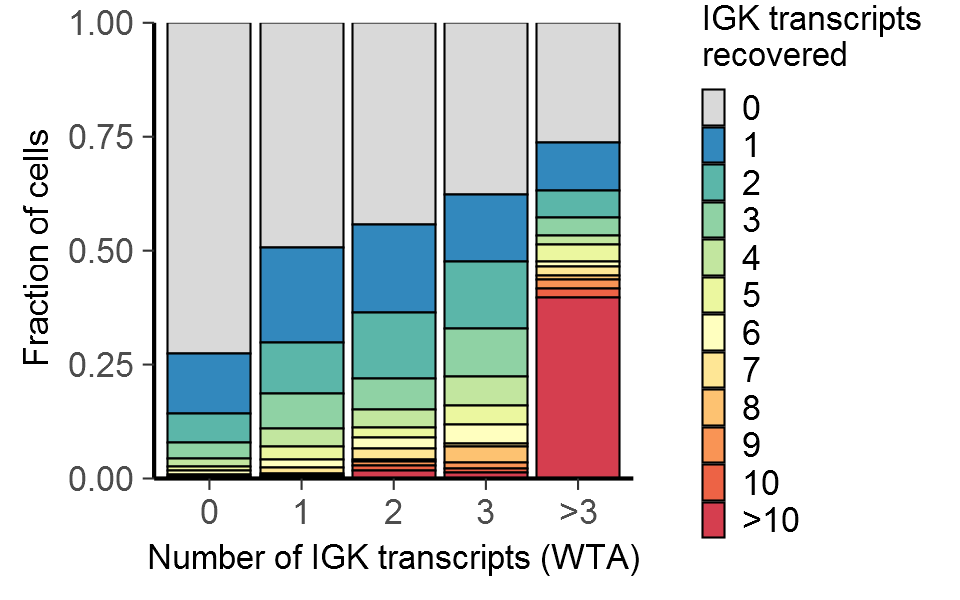

In [29]:
seurat@meta.data$IGK_bin = cut(seurat@meta.data$IGK_sum, c(-1,0, 1,2,3, 10000))

options(repr.plot.width = 3.2, repr.plot.heIGKt = 2)
seurat@meta.data$IGK_recover_bin= seurat@meta.data$IGK_recover
seurat@meta.data$IGK_recover_bin[is.na(seurat@meta.data$IGK_recover_bin) ] = 0
seurat@meta.data$IGK_recover_bin[seurat@meta.data$IGK_recover > 10] = '>10'
seurat@meta.data$IGK_recover_bin = factor(seurat@meta.data$IGK_recover_bin, levels =c (0,1,2,3,4,5,6,7,8,9,10,'>10'))
ggplot(seurat@meta.data %>%  filter(cluster_name != 'Non-B cell'), aes(x = IGK_bin, fill = IGK_recover_bin)) + geom_bar(position = 'fill', size = .177, color = 'black')  + 
        scale_fill_manual(values = c('grey85', rev(colorRampPalette(brewer.pal(9, 'Spectral'))(11)))) + 
theme_classic() + Axis_themes +theme(legend.key.size = unit(2, 'mm')) + scale_x_discrete(labels= c(0, 1,2,3,'>3')) + 
# guides(fill = guide_legend(override.aes = list(size = .2)))+
scale_y_continuous(expand = c(0,0)) + labs(x = 'Number of IGK transcripts (WTA)', y = 'Fraction of cells', fill = 'Number of\nIGK transcripts\nrecovered')

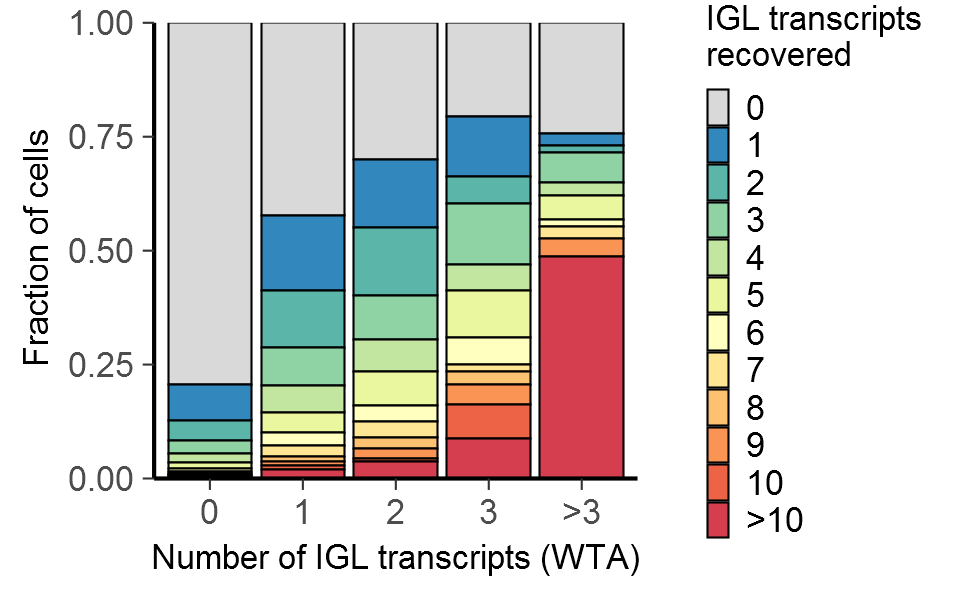

In [30]:
seurat@meta.data$IGL_bin = cut(seurat@meta.data$IGL_sum, c(-1,0, 1,2,3, 10000))

options(repr.plot.width = 3.2, repr.plot.heIGLt = 2)
seurat@meta.data$IGL_recover_bin= seurat@meta.data$IGL_recover
seurat@meta.data$IGL_recover_bin[is.na(seurat@meta.data$IGL_recover_bin) ] = 0
seurat@meta.data$IGL_recover_bin[seurat@meta.data$IGL_recover > 10] = '>10'
seurat@meta.data$IGL_recover_bin = factor(seurat@meta.data$IGL_recover_bin, levels =c (0,1,2,3,4,5,6,7,8,9,10,'>10'))
ggplot(seurat@meta.data %>%  filter(cluster_name != 'Non-B cell'), aes(x = IGL_bin, fill = IGL_recover_bin)) + geom_bar(position = 'fill', size = .177, color = 'black')  + 
        scale_fill_manual(values = c('grey85', rev(colorRampPalette(brewer.pal(9, 'Spectral'))(11)))) + 
theme_classic() + Axis_themes +theme(legend.key.size = unit(2, 'mm')) + scale_x_discrete(labels= c(0, 1,2,3,'>3')) + 
# guides(fill = guide_legend(override.aes = list(size = .2)))+
scale_y_continuous(expand = c(0,0)) + labs(x = 'Number of IGL transcripts (WTA)', y = 'Fraction of cells', fill = 'Number of\nIGL transcripts\nrecovered')

In [35]:
#saveRDS(seurat, '20240306_seurat.RDS')

In [36]:
hc = readRDS('hc.RDS') 


In [37]:
seurat@meta.data %>% filter(cluster_name == 'Non-B cell') %>% group_by(IGH_recovery) %>% summarize(frac = sum(IGH_sum > 0)/n()) %>% mutate(frac[2]/frac[1])
seurat@meta.data %>% filter(cluster_name == 'Non-B cell') %>% group_by(IGL_recovery) %>% summarize(frac = sum(IGL_sum + IGK_sum > 0)/n()) %>% mutate(frac[2]/frac[1])

IGH_recovery,frac,frac[2]/frac[1]
<dbl>,<dbl>,<dbl>
0,0.0413021,16.14123
1,0.6666667,16.14123


IGL_recovery,frac,frac[2]/frac[1]
<dbl>,<dbl>,<dbl>
0,0.009454273,23.87686
1,0.225738397,23.87686


In [38]:
isotypes = c("IGHM", 'IGHD', 'IGHG1', 'IGHG2', 'IGHG3', 'IGHG4', 'IGHA1', 'IGHA2')
data = GetAssayData(seurat, 'counts')[isotypes,]
colnames(data) = colnames(seurat)
data[data <= 2] = 0
#data[2,] = 0
data[3,] = colSums(data[3:6,])
data[4,] = colSums(data[7:8,])


data = data[1:4,]
rownames(data) = c('IGHM', 'IGHD', 'IGHG1', 'IGHA1')
#data[data == 1] = 0
seurat$most_common = rownames(data)[apply(data, 2, which.max)]

#head(data)
data[1,] = data[1,] + data[2,]
#data[2,] = 0
#mult = which(colSums(data > 0) > 1)
#length(mult)


seurat$most_common[seurat$most_common %in% c('IGHA1', 'IGHA2')] = 'IgA'
seurat$most_common[seurat$most_common %in% c('IGHG1', 'IGHG2', 'IGHG3', 'IGHG4')] = 'IgG'
seurat$most_common[seurat$most_common %in% c('IGHM')] = 'IgM'
seurat$most_common[seurat$most_common %in% c('IGHD')] = 'IgD'

seurat$most_common[colSums(data) == 0] = NA
seurat$most_common[seurat$cluster_name == 'Non-B cell'] = NA
#seurat$most_common[mult] = 'Mult'

seurat

An object of class Seurat 
26197 features across 24806 samples within 1 assay 
Active assay: RNA (26197 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

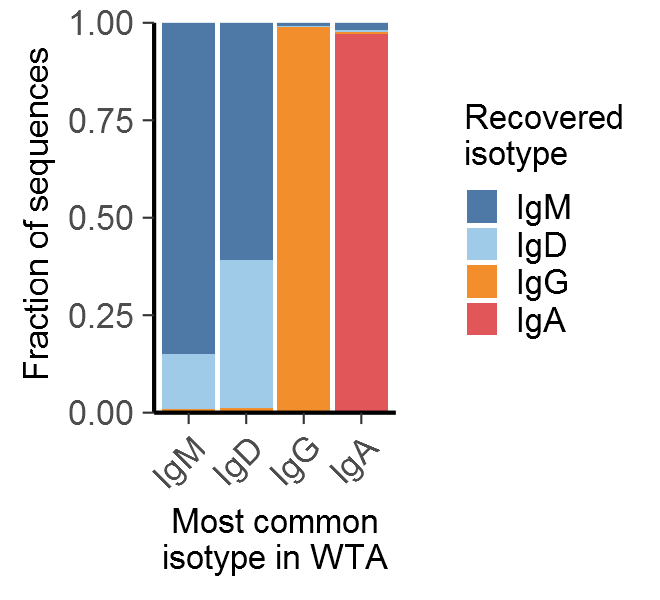

In [39]:
library(ggthemes)
options(repr.plot.width = 2.2)
hc = readRDS('hc.RDS') %>% filter(FUNCTIONAL)

hc$most_common = seurat$most_common[match(hc$LANE_ID, seurat$id)]
hc$ISOTYPE[hc$ISOTYPE == 'IGHG1/2'] = 'IGHG'
isotype_pal = tableau_color_pal(palette = 'Tableau 20')(20)[c(11,2,3,1)]
names(isotype_pal) = rev(c('IGHM', 'IGHG', 'IGHD', 'IGHA'))
hc$ISOTYPE = factor(hc$ISOTYPE, levels = c("IGHM",'IGHD', 'IGHG', 'IGHA'))
ggplot(hc %>% filter(!is.na(most_common)), aes(x = most_common, fill = ISOTYPE)) + geom_bar(position = 'fill') + theme_classic() + Axis_themes + labs(x = 'Most common\nisotype in WTA' , y = 'Fraction of sequences') + 
scale_fill_manual(values = isotype_pal, limits =c ('IGHM', 'IGHD', 'IGHG', 'IGHA'), labels = c ('IgM', 'IgD', 'IgG', 'IgA'))  + scale_x_discrete(limits = c('IgM', 'IgD', 'IgG', 'IgA')) + scale_y_continuous(expand = c(0,0)) + labs(fill = 
'Recovered\nisotype') + theme(legend.key.size = unit(.3, 'cm'), axis.text.x = element_text(angle = 45, hjust = 1))

ggsave('Figures/isotype_bars.pdf', height = 1.8, width = 2, useDingbats = FALSE)

In [40]:
hc$most_common_form = gsub(hc$most_common, pattern = 'Ig', replacement = 'IGH')
hc %>% group_by(most_common_form) %>% filter(!is.na(most_common_form)) %>% summarize(frac = sum(most_common_form == ISOTYPE)/n(), tot = n())

most_common_form,frac,tot
<chr>,<dbl>,<int>
IGHA,0.9704757,1829
IGHD,0.3786870,1051
IGHG,0.9850746,1541
IGHM,NA,15094


In [41]:
hc$most_common_form = gsub(hc$most_common, pattern = 'Ig', replacement = 'IGH')
hc %>% group_by(most_common_form) %>% filter(!is.na(most_common_form), !is.na(ISOTYPE)) %>% summarize(frac = sum(most_common_form == ISOTYPE, na.rm = TRUE)/n(), tot = n())

most_common_form,frac,tot
<chr>,<dbl>,<int>
IGHA,0.9704757,1829
IGHD,0.3786870,1051
IGHG,0.9850746,1541
IGHM,0.8514543,15093


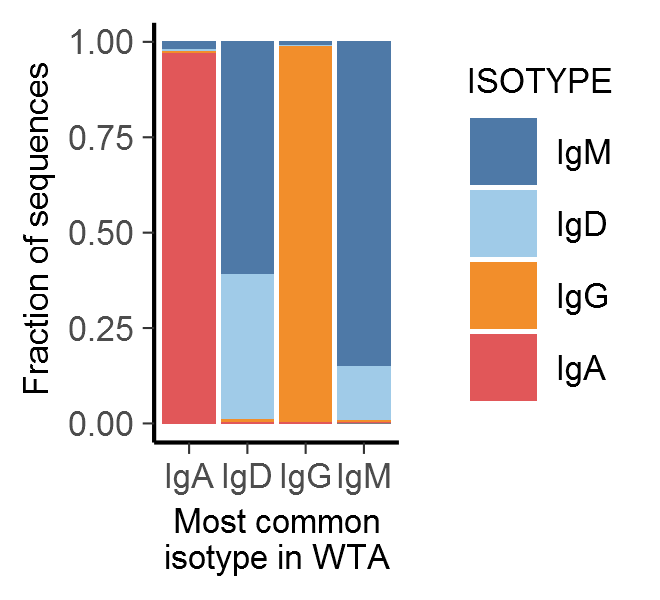

In [42]:
library(ggthemes)
hc = readRDS('hc.RDS') %>% filter(FUNCTIONAL)

hc$most_common = seurat$most_common[match(hc$LANE_ID, seurat$id)]
hc$ISOTYPE[hc$ISOTYPE == 'IGHG1/2'] = 'IGHG'
isotype_pal = tableau_color_pal(palette = 'Tableau 20')(20)[c(11,2,3,1)]
names(isotype_pal) = rev(c('IGHM', 'IGHG', 'IGHD', 'IGHA'))
hc$ISOTYPE = factor(hc$ISOTYPE, levels = c("IGHM",'IGHD', 'IGHG', 'IGHA'))
ggplot(hc %>% filter(!is.na(most_common)), aes(x = most_common, fill = ISOTYPE)) + geom_bar(position = 'fill') + theme_classic() + Axis_themes + labs(x = 'Most common\nisotype in WTA' , y = 'Fraction of sequences') + 
scale_fill_manual(values = isotype_pal, limits =c ('IGHM', 'IGHD', 'IGHG', 'IGHA'), labels = c ('IgM', 'IgD', 'IgG', 'IgA'))  

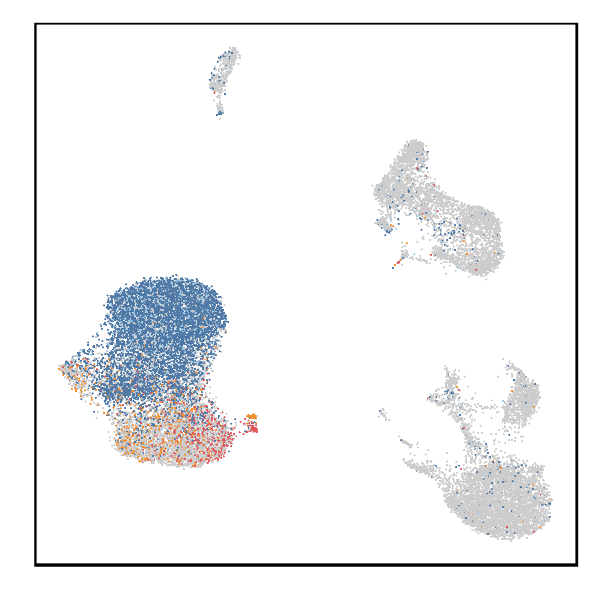

In [43]:
mode= function(x) {
    ret = NA
    if (length(x) > 0){
    tab = table(x)
    tab = tab[order(tab, decreasing = TRUE)]
    ret = names(tab)[1]
        }
    as.character(ret)
}
iso_most = hc %>% group_by(LANE_ID) %>% summarize(iso = mode(ISOTYPE))
seurat$recovered_isotype = iso_most$iso[match(seurat$id, iso_most$LANE_ID)]


options(repr.plot.width = 2, repr.plot.height = 2)
ggplot(seurat@meta.data[sample(rownames(seurat@meta.data)),], aes(x = UMAP1,  y = UMAP2, color = recovered_isotype)) + geom_point_rast(size = .2, stroke = 0, raster.dpi = 1000) + UMAP_theme + scale_color_manual(values = isotype_pal, na.value = 'grey80')

ggsave('Figures/isotype_umap.pdf',height = 1.8, width = 2, useDingbats = FALSE)

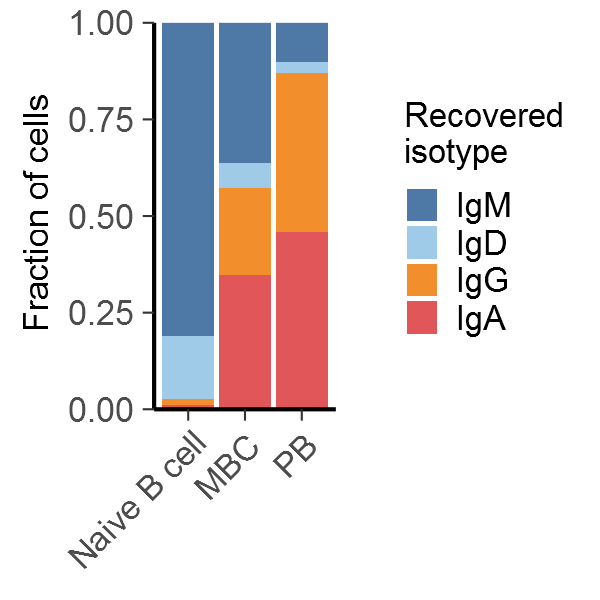

In [44]:
hc$cluster_name = seurat$cluster_name[match(hc$LANE_ID, seurat$id)]

ggplot(hc %>% filter(cluster_name != 'Non-B cell'), aes(x = cluster_name, fill = ISOTYPE)) + geom_bar(position = 'fill') + theme_classic() + Axis_themes + labs(x = c() , y = 'Fraction of cells') + 
scale_fill_manual(values = isotype_pal, limits =c ('IGHM', 'IGHD', 'IGHG', 'IGHA'), labels = c ('IgM', 'IgD', 'IgG', 'IgA')) + scale_y_continuous(expand = c(0,0)) + labs(fill = 
'Recovered\nisotype')  + theme(axis.text.x = element_text(angle = 45, hjust = 1))+ theme(legend.key.size = unit(.3, 'cm'))

ggsave('Figures/isotype_bars2.pdf', height = 1.8, width = 1.95,  useDingbats = FALSE)

In [45]:
ighv = rownames(seurat)[grep(x = rownames(seurat), pattern = '^IGHV')]


In [46]:
library(stringr)
seurat$Vuse = sapply(seurat$GERMLINE_V_CALL, function(x) str_split(x, fixed('*'))[[1]][1])

ighv = rownames(seurat)[grep(x = rownames(seurat), pattern = '^IGHV')]
ighv = ighv[ighv %in% seurat$Vuse]
dat = GetAssayData(seurat, 'counts')[ighv,]
colnames(dat) = colnames(seurat)

dat = dat[,colSums(dat) > 1]

ighv_most = rownames(dat)[apply(dat, 2, which.max)]
names(ighv_most) = colnames(dat)
seurat$IGHV_most = ighv_most
library(stringr)

sub = seurat@meta.data %>% filter(cluster_name != 'Non-B cell', !is.na(IGHV_most))
tab = table(sub$IGHV_most, sub$Vuse)
tab = tab[rownames(tab) %in% ighv, colnames(tab) %in% ighv]
tab = tab[rowSums(tab) > 1,]
tab = tab[,colSums(tab) > 1]
                     
tab = tab[rownames(tab) %in% colnames(tab), colnames(tab) %in% rownames(tab)]

rownames(tab) = gsub(x = rownames(tab), pattern = 'IGHV', replacement = '')
colnames(tab) = gsub(x = colnames(tab), pattern = 'IGHV', replacement = '')

#tab = tab[order(apply(tab, 1, which.max)),]
#tab = tab[,order(apply(tab, 2, which.max))]

                     library(pheatmap)
                     
    options(repr.plot.width = 3, repr.plot.height = 3)
pheatmap(tab/rowSums(tab), cluster_rows = FALSE, cluster_cols = FALSE, fontsize = 8, color = colorRampPalette(c('white', 'dodgerblue3'))(100), 
        height = 2.7, width = 2.7, filename = 'Figures/ighv.pdf', border_color = 'black', cellheight = 4.7, cellwidth = 4.7, angle_col = 90)

In [47]:
seurat$Luse = sapply(seurat$IGLV, function(x) str_split(x, fixed('*'))[[1]][1])

igkv = rownames(seurat)[grep(x = rownames(seurat), pattern = '^IGKV')]
iglv =  rownames(seurat)[grep(x = rownames(seurat), pattern = '^IGLV')]
iglv = c(igkv, iglv)
iglv = iglv[iglv %in% seurat$Luse]
dat = GetAssayData(seurat, 'counts')[iglv,]
colnames(dat) = colnames(seurat)

dat = dat[,colSums(dat) > 1]

iglv_most = rownames(dat)[apply(dat, 2, which.max)]
names(iglv_most) = colnames(dat)
seurat$IGLV_most = iglv_most
library(stringr)

sub = seurat@meta.data %>% filter(cluster_name != 'Non-B cell', !is.na(IGLV_most))
tab = table(sub$IGLV_most, sub$Luse)
tab = tab[rownames(tab) %in% iglv, colnames(tab) %in% iglv]
tab = tab[rowSums(tab) > 1,]
tab = tab[,colSums(tab) > 1]
                     
tab = tab[rownames(tab) %in% colnames(tab), colnames(tab) %in% rownames(tab)]
rownames(tab) = gsub(x = rownames(tab), pattern = 'IGLV', replacement = '')
rownames(tab) = gsub(x = rownames(tab), pattern = 'IGKV', replacement = '')
colnames(tab) = rownames(tab)
#tab = tab[order(apply(tab, 1, which.max)),]
#tab = tab[,order(apply(tab, 2, which.max))]

                     library(pheatmap)
                     
    options(repr.plot.width = 3, repr.plot.height = 3)
pheatmap(tab/rowSums(tab), cluster_rows = FALSE, cluster_cols = FALSE, fontsize = 6, color = colorRampPalette(c('white', 'dodgerblue3'))(100), 
        height = 2.7, width = 2.7, filename = 'Figures/ighvl.pdf', border_color = 'black', cellheight = 4.7, cellwidth = 4.7, angle_col = 90)

In [48]:
cell_consensus_hc =readRDS('cell_consensus_hc.RDS')
library(stringr)

In [49]:
#cell_consensus_hc = read.table('hc_consensus.tab', stringsAsFactors = FALSE, sep = '\t', header = TRUE) 
#cell_consensus_lc = read.table('lc_consensus.tab', stringsAsFactors = FALSE, sep = '\t', header = TRUE) 
files = paste0('C:/Users/dmorgan/IgPhyMl/', 'BM2_clone-pass_germ-pass.tab')
for (curr in files) {
   if (curr == files[1]) {
       df = read.table(curr, stringsAsFactors = FALSE, header = TRUE, sep = '\t')
   } 
   else {
       df = rbind(df, read.table(curr, stringsAsFactors = FALSE, header = TRUE, sep = '\t'))
   }    
}
cell_consensus_hc = df


In [52]:
library(shazam)
cell_consensus_hc = observedMutations(cell_consensus_hc, sequenceColumn = 'SEQUENCE_IMGT', germlineColumn = 'GERMLINE_SEQUENCE_D_MASK', frequency = TRUE) %>% mutate(MU_FREQ_TOTAL = mu_freq_seq_r + mu_freq_seq_s) 


Warning message:
"package 'shazam' was built under R version 4.1.3"
As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.



Warning message:
"Removed 4992 rows containing non-finite values (`stat_boxplot()`)."
Warning message:
"Removed 4992 rows containing non-finite values (`stat_signif()`)."
Warning message:
"Removed 5013 rows containing non-finite values (`stat_boxplot()`)."
Warning message:
"Removed 5013 rows containing non-finite values (`stat_signif()`)."


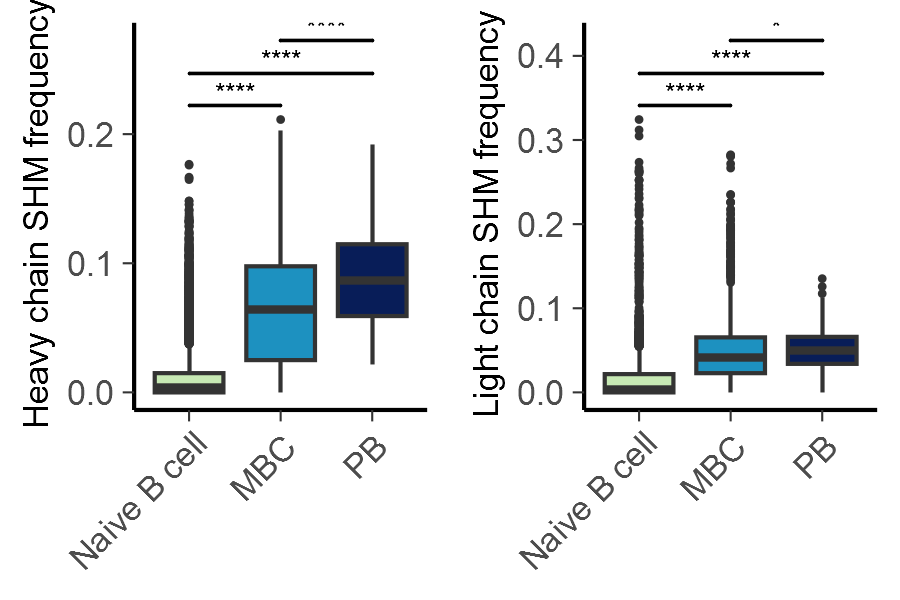

In [53]:
seurat$IGH_MU_FREQ = cell_consensus_hc$MU_FREQ_TOTAL[match(seurat$id, cell_consensus_hc$LANE_ID)]
options(repr.plot.width = 3,repr.plot.height =2 )
g1 = ggplot(seurat@meta.data %>% filter(cluster_name != 'Non-B cell'), aes(x = cluster_name, y = IGL_MU_FREQ, fill = cluster_name))  + 
geom_boxplot(outlier.size =.1, size = .355) +
theme_classic() + Axis_themes +
 labs(x = c(), y = 'Light chain SHM frequency') + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
scale_fill_manual(values = cluster_palette[2:4]) + guides(fill = FALSE) + stat_compare_means(comparison = list(c(1,2), c(1,3), c(2,3)), label = 'p.signif', tip.length = 0)
g1$layers[[2]]$aes_params$textsize <- 2.1167

g2 = ggplot(seurat@meta.data %>% filter(cluster_name != 'Non-B cell'), aes(x = cluster_name, y = IGH_MU_FREQ, fill = cluster_name))  + 
geom_boxplot(outlier.size =.1, size = .355) +
theme_classic() + Axis_themes +
 labs(x = c(), y = 'Heavy chain SHM frequency') + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
scale_fill_manual(values = cluster_palette[2:4]) + guides(fill = FALSE) + stat_compare_means(comparison = list(c(1,2), c(1,3), c(2,3)), label = 'p.signif', tip.length = 0)
g2$layers[[2]]$aes_params$textsize <- 2.1167


cowplot::plot_grid(g2, g1)
ggsave('Figures/boxes_mutation.pdf', height = 1.8, width = 2.4)


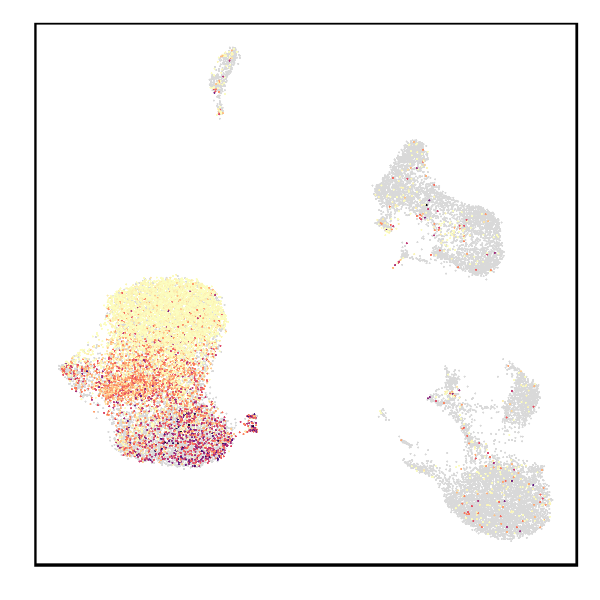

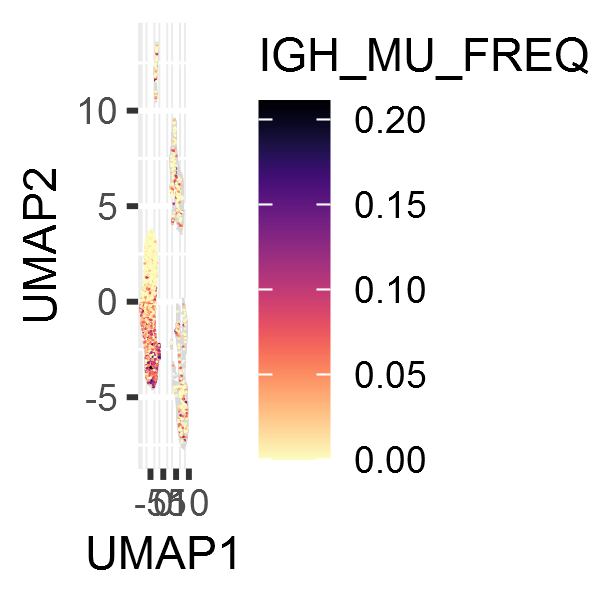

In [54]:
options(repr.plot.width = 2, repr.plot.height = 2)
ggplot(seurat@meta.data[sample(rownames(seurat@meta.data)),] %>% arrange(!is.na(IGH_MU_FREQ)), aes(x = UMAP1,  y = UMAP2, color = IGH_MU_FREQ))+ 
       geom_point_rast(size = .2, stroke = 0, raster.dpi = 1000) +
UMAP_theme +
scale_color_viridis(option = 1, direction = -1, na.value = 'grey85')
ggsave('Figures/mutation_umap.pdf', useDingbats = FALSE, width = 1.8, height = 1.8) 



options(repr.plot.width = 2, repr.plot.height = 2)
ggplot(seurat@meta.data[sample(rownames(seurat@meta.data)),] %>% arrange(!is.na(IGH_MU_FREQ)), aes(x = UMAP1,  y = UMAP2, color = IGH_MU_FREQ))+ 
       geom_point(size = .2, stroke = 0) +
scale_color_viridis(option = 1, direction = -1, na.value = 'grey85')
ggsave('Figures/mutation_umap_legend.pdf', useDingbats = FALSE, width = 1.8, height = 1.8) 



 IgA  IgD  IgG  IgM 
 640 1357  720 6436 

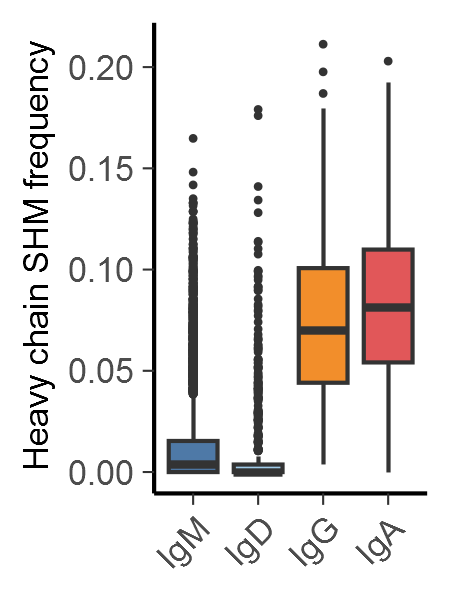

In [55]:
options(repr.plot.width = 1.5,repr.plot.height =2 )
seurat@meta.data$iso_plot = gsub(seurat$ISOTYPE, pattern = 'GH', replacement = 'g')
seurat$iso_plot[seurat$iso_plot == 'IgG1/2'] = 'IgG'
table(seurat$iso_plot)
isotype_pal = tableau_color_pal(palette = 'Tableau 20')(20)[c(11,2,3,1)]
names(isotype_pal) = rev(c('IgM', 'IgG', 'IgD', 'IgA'))

g1 = ggplot(seurat@meta.data %>% filter(cluster_name != 'Non-B cell', !is.na(iso_plot), ISOTYPE != 'IGKC'), aes(x = iso_plot, y = IGH_MU_FREQ, fill = iso_plot))  + 
geom_boxplot(outlier.size =.1, size = .355) +
theme_classic() + Axis_themes +
 labs(x = c(), y = 'Heavy chain SHM frequency') + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
scale_fill_manual(values = isotype_pal) + guides(fill = FALSE) +# stat_compare_means(comparison = list(c(1,2), c(1,3), c(2,3)), label = 'p.signif') +
 scale_x_discrete(limits =c ('IgM', 'IgD', 'IgG', 'IgA'))
#g1$layers[[2]]$aes_params$textsize <- 2.1167
g1

ggsave('Figures/isotype_mutation.pdf', height = 1.8, width = 1.3, useDingbats = FALSE)